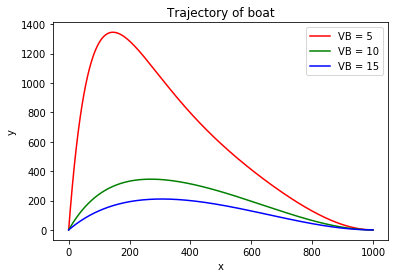

In [2]:
#system of equation -- this is with y not defined in findNext
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math
#define constants
a = 1000
vr0 = 10
vb1 = 5
vb2 = 10
vb3 = 15

h = 0.01
x0=a
xf=0
#given functions
def f(x, vb):
    num1 = 2* vr0/ vb
    num2 = (1-(x/a))**2
    num3 = math.sinh(num1 * num2)
    return x * num3
def w(x):
    num1 = (x/a) - (x**2/a**2)
    return 4 * vr0 * num1
#differential equation
def xprime(x,y,vb):
    costheta = x/math.sqrt(x**2 + y**2)
    return -vb * costheta
def yprime(x,y,vb):
    sintheta = y/math.sqrt(x**2 + y**2)
    return -vb * sintheta + w(x)# y from given function
    
#one step
def findNext(x,y,h,vb):
    #y = f(x,vb)
    xnew = x +h * xprime(x,y,vb)
    ynew = y + h * yprime(x,y,vb)
    return xnew,ynew
#whole thing + graph set up
x = x0
y = 0
xs1 = list()
ys1 = list()
xs1.append(x)
ys1.append(y)
while(x>xf):
    x,y = findNext(x,y,h,vb1)
    xs1.append(x)
    ys1.append(y)

x = x0
y = 0
xs2 = list()
ys2 = list()
xs2.append(x)
ys2.append(y)
while(x>xf):
    x,y = findNext(x,y,h,vb2)
    xs2.append(x)
    ys2.append(y)

x = x0
y = 0
xs3 = list()
ys3 = list()
xs3.append(x)
ys3.append(y)
while(x>xf):
    x,y = findNext(x,y,h,vb3)
    xs3.append(x)
    ys3.append(y)


#graphing
vb5, = plt.plot(xs1,ys1,label = "VB = 5",color = 'r')
vb10, = plt.plot(xs2,ys2,label = "VB = 10",color = 'g')
vb15, = plt.plot(xs3,ys3,label = "VB = 15",color = 'blue')
plt.legend(handles = [vb5,vb10,vb15])
plt.xlabel('x')
plt.ylabel('y')
plt.title("Trajectory of boat")
plt.show()

Curve fit
b 0   =  740.75713
b 1   =    2.43871
b 2   =   -0.00392
Curve fit
b 0   =   136.4615
b 1   =    0.89174
b 2   =   -0.00117
Curve fit
b 0   =   74.79803
b 1   =    0.56424
b 2   =   -0.00072


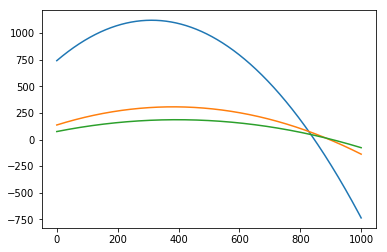

In [17]:
from numpy.polynomial import polynomial as P
fit = P.polyfit(xs1[::-1],ys1[::-1],2)
print("Curve fit")
for i in range(len(fit)):
    print("b",i,"  =", "%10s" % round(fit[i],5))
xaxis = np.arange(0,1000,0.1)
def f(b0,b1,b2,x):
    return b0 + b1*x + b2* x**2
plt.plot(xaxis, f(fit[0], fit[1],fit[2],xaxis))

fit = P.polyfit(xs2[::-1],ys2[::-1],2)
print("Curve fit")
for i in range(len(fit)):
    print("b",i,"  =", "%10s" % round(fit[i],5))
xaxis = np.arange(0,1000,0.1)
def f(b0,b1,b2,x):
    return b0 + b1*x + b2* x**2
plt.plot(xaxis, f(fit[0], fit[1],fit[2],xaxis))

fit = P.polyfit(xs3[::-1],ys3[::-1],2)
print("Curve fit")
for i in range(len(fit)):
    print("b",i,"  =", "%10s" % round(fit[i],5))
xaxis = np.arange(0,1000,0.1)
def f(b0,b1,b2,x):
    return b0 + b1*x + b2* x**2
plt.plot(xaxis, f(fit[0], fit[1],fit[2],xaxis))
plt.show()